# Business startup success prediction:Classification problem
in this case study we try to find those comapanies which will be successful or not successful  in future based on some feaures
for this problem i have used crunchbase dataset which have around 54,000 companies dataset around globe for more details check report of this project.

# Pre-Explore

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('investments_VC.csv', encoding='unicode_escape' )

In [3]:
data.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [7]:
data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

### checking missing and duplicates values

In [8]:
missing_data = data.isnull()

for column in missing_data.columns.values.tolist():
 print (column)
 print (missing_data[column].value_counts())
 print("")  

permalink
False    49438
True      4856
Name: permalink, dtype: int64

name
False    49437
True      4857
Name: name, dtype: int64

homepage_url
False    45989
True      8305
Name: homepage_url, dtype: int64

category_list
False    45477
True      8817
Name: category_list, dtype: int64

 market 
False    45470
True      8824
Name:  market , dtype: int64

 funding_total_usd 
False    49438
True      4856
Name:  funding_total_usd , dtype: int64

status
False    48124
True      6170
Name: status, dtype: int64

country_code
False    44165
True     10129
Name: country_code, dtype: int64

state_code
False    30161
True     24133
Name: state_code, dtype: int64

region
False    44165
True     10129
Name: region, dtype: int64

city
False    43322
True     10972
Name: city, dtype: int64

funding_rounds
False    49438
True      4856
Name: funding_rounds, dtype: int64

founded_at
False    38554
True     15740
Name: founded_at, dtype: int64

founded_month
False    38482
True     15812
Name: founded

In [9]:
#closer look on value count on each feature  
for n in data.columns.values.tolist():
    print(n)
    print (data[n].value_counts())
    print("")  

permalink
/organization/treasure-valley-urology-services    2
/organization/prysm                               2
/organization/tech-li                             1
/organization/athersys                            1
/organization/dalia-research                      1
                                                 ..
/organization/imaxio                              1
/organization/shopboostr                          1
/organization/gvisp                               1
/organization/reelmotionmedia-com                 1
/organization/iminent                             1
Name: permalink, Length: 49436, dtype: int64

name
Roost                 4
Spire                 4
Shift                 3
Roadmap               3
Compass               3
                     ..
GeoPal Solutions      1
Achieved.co           1
GELI                  1
Easy Social Shop      1
Game Plan Holdings    1
Name: name, Length: 49350, dtype: int64

homepage_url
http://www.victiv.com            2
http://youbeau

In [10]:
data.tail(5)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
54289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.duplicated().sum()

4855

Seeing this we can say that the data has duplicates, missing values, and there's spacing in column 'market' and 'funding_total_usd'. 

# Data Preprocessing


> 1. Fixing space in columns

> 2. Remove Duplicates

> 3. Change uncommon data format

> 4. Handling other missing values

> 5. Add target variable

> 6. Change Object data type into numeric










## 1. Fixing space in column


---




In [12]:
data = data[~data.name.isna()] #remove companies with no name

In [13]:
data1 = data.copy()

In [14]:
data1.rename(columns= {' market ':'market', ' funding_total_usd ':'funding_total_usd' }, inplace= True)

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49437 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49437 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45988 non-null  object 
 3   category_list         45476 non-null  object 
 4   market                45469 non-null  object 
 5   funding_total_usd     49437 non-null  object 
 6   status                48123 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49437 non-null  float64
 12  founded_at            38553 non-null  object 
 13  founded_month         38481 non-null  object 
 14  founded_quarter       38481 non-null  object 
 15  founded_year       

In [16]:
data1.name.isnull().sum()

0

## 2. Remove Duplicate (All NaN in whole columns) 

---



In [17]:
data1.duplicated().sum()

0

In [18]:
data1.tail()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,NaN,London,London,1.0,2013-01-28,2013-01,2013-Q1,2013.0,2014-03-24,2014-03-24,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,"15,87,301",operating,CHN,NaN,Beijing,Beijing,1.0,NaN,NaN,NaN,NaN,2012-04-01,2012-04-01,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,NaN,Split,Split,5.0,2012-05-13,2012-05,2012-Q2,2012.0,2011-11-01,2014-09-10,71525.0,0.0,0.0,0.0,25873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,/organization/a-list-games,[a]list games,http://www.alistgames.com,|Games|,Games,"93,00,000",operating,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2011-11-21,2011-11-21,9300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49437,/organization/x,[x+1],http://www.xplusone.com/,|Enterprise Software|,Enterprise Software,"4,50,00,000",operating,USA,NY,New York City,New York,4.0,1999-01-01,1999-01,1999-Q1,1999.0,2008-06-01,2013-04-04,0.0,28000000.0,0.0,0.0,0.0,17000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16000000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
print('Duplicated entries:',data1.duplicated().sum())
data1[data1.duplicated()].isna().sum(axis=0)

Duplicated entries: 0


permalink               0.0
name                    0.0
homepage_url            0.0
category_list           0.0
market                  0.0
funding_total_usd       0.0
status                  0.0
country_code            0.0
state_code              0.0
region                  0.0
city                    0.0
funding_rounds          0.0
founded_at              0.0
founded_month           0.0
founded_quarter         0.0
founded_year            0.0
first_funding_at        0.0
last_funding_at         0.0
seed                    0.0
venture                 0.0
equity_crowdfunding     0.0
undisclosed             0.0
convertible_note        0.0
debt_financing          0.0
angel                   0.0
grant                   0.0
private_equity          0.0
post_ipo_equity         0.0
post_ipo_debt           0.0
secondary_market        0.0
product_crowdfunding    0.0
round_A                 0.0
round_B                 0.0
round_C                 0.0
round_D                 0.0
round_E             

In [20]:
#data1.dropna(how='all', inplace=True)

In [21]:
data2 = data1.copy()

In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49437 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49437 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45988 non-null  object 
 3   category_list         45476 non-null  object 
 4   market                45469 non-null  object 
 5   funding_total_usd     49437 non-null  object 
 6   status                48123 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49437 non-null  float64
 12  founded_at            38553 non-null  object 
 13  founded_month         38481 non-null  object 
 14  founded_quarter       38481 non-null  object 
 15  founded_year       

In [23]:
data3= data2.copy()

## 3. Change Uncommon Format

---

  Then we tackle this by eliminate the comma and change the type into float, as process following 

In [24]:
data3.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [25]:
data3['funding_total_usd'] = data3['funding_total_usd'].str.replace(',', '')
data3['funding_total_usd'] = data3['funding_total_usd'].str.replace('-', '')
data3['funding_total_usd'] = data3['funding_total_usd'].str.replace(' ', '')

data3['funding_total_usd'] = pd.to_numeric(data3['funding_total_usd'], errors='coerce')

In [26]:
data3.dtypes

permalink                object
name                     object
homepage_url             object
category_list            object
market                   object
funding_total_usd       float64
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A 

In [27]:
data4=data3.drop(columns=['permalink', 'name','homepage_url', 'category_list','state_code', 'city', 'founded_at', 'founded_month',
       'founded_quarter','first_funding_at','last_funding_at'])

In [28]:
data4.head(3)

,market,funding_total_usd,status,country_code,region,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,News,1750000.0,acquired,USA,New York City,1.0,2012.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Games,4000000.0,operating,USA,Los Angeles,2.0,NaN,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Publishing,40000.0,operating,EST,Tallinn,1.0,2012.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
missing_data = data4.isnull()

for column in missing_data.columns.values.tolist():
 print (column)
 print (missing_data[column].value_counts())
 print("")  

market
False    45469
True      3968
Name: market, dtype: int64

funding_total_usd
False    40906
True      8531
Name: funding_total_usd, dtype: int64

status
False    48123
True      1314
Name: status, dtype: int64

country_code
False    44165
True      5272
Name: country_code, dtype: int64

region
False    44165
True      5272
Name: region, dtype: int64

funding_rounds
False    49437
Name: funding_rounds, dtype: int64

founded_year
False    38481
True     10956
Name: founded_year, dtype: int64

seed
False    49437
Name: seed, dtype: int64

venture
False    49437
Name: venture, dtype: int64

equity_crowdfunding
False    49437
Name: equity_crowdfunding, dtype: int64

undisclosed
False    49437
Name: undisclosed, dtype: int64

convertible_note
False    49437
Name: convertible_note, dtype: int64

debt_financing
False    49437
Name: debt_financing, dtype: int64

angel
False    49437
Name: angel, dtype: int64

grant
False    49437
Name: grant, dtype: int64

private_equity
False    49437
Na

In [30]:
data4.describe()

,funding_total_usd,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,4.090600e+04,49437.000000,38481.000000,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04
mean,1.591291e+07,1.696219,2007.359034,2.173254e+05,7.501202e+06,6.163447e+03,1.302239e+05,2.336457e+04,1.888195e+06,6.542030e+04,1.628486e+05,2.074328e+06,6.088860e+05,4.434449e+05,3.845670e+04,7.074370e+03,1.243980e+06,1.492921e+06,1.205380e+06,7.375410e+05,3.424751e+05,1.697726e+05,5.767183e+04,1.423226e+04
std,1.686808e+08,1.294222,7.579279,1.056995e+06,2.847139e+07,1.999068e+05,2.981434e+06,1.432060e+06,1.382060e+08,6.582974e+05,5.612145e+06,3.167263e+07,2.678375e+07,3.428204e+07,3.864500e+06,4.282209e+05,5.532027e+06,7.472777e+06,7.993671e+06,9.815317e+06,5.406969e+06,6.277969e+06,5.252365e+06,2.716893e+06
min,1.000000e+00,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.500000e+05,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+06,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+07,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.007950e+10,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,4.700000e+09,5.800000e+09,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [31]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49437 entries, 0 to 49437
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   market                45469 non-null  object 
 1   funding_total_usd     40906 non-null  float64
 2   status                48123 non-null  object 
 3   country_code          44165 non-null  object 
 4   region                44165 non-null  object 
 5   funding_rounds        49437 non-null  float64
 6   founded_year          38481 non-null  float64
 7   seed                  49437 non-null  float64
 8   venture               49437 non-null  float64
 9   equity_crowdfunding   49437 non-null  float64
 10  undisclosed           49437 non-null  float64
 11  convertible_note      49437 non-null  float64
 12  debt_financing        49437 non-null  float64
 13  angel                 49437 non-null  float64
 14  grant                 49437 non-null  float64
 15  private_equity     

## 4. Handling other missing value by replacing : 

1. Replace missing value in 'market' with 'other'
2. Replace missing value in 'funding_total_usd' with 0
3. Replace missing value in 'status' with majority status 'operating' 
4. Replace missing value in 'country_code' with OTHER
5. Replace missing value in 'region' with other
6. Replace missing value in 'founded_year' with mean
---




1. Missing Value in 'market'
Will replace the nan value with 'other' category market.

In [32]:
data4['market'].isnull().sum()

3968

In [33]:
data4['market'].replace(np.nan, 'other', inplace=True)

In [34]:
data4.market.isnull().sum()

0

2. Missing Value in 'funding_total_usd' will be replaced by 0.

In [35]:
data4['funding_total_usd'].isnull().sum()

8531

In [36]:
data4['funding_total_usd'].replace(np.nan, 0, inplace=True)

In [37]:
data4['funding_total_usd'].isnull().sum()

0

3. Missing value in status will be replaced by majority status 'operating'

In [38]:
data4['status'].value_counts()

operating    41829
acquired      3692
closed        2602
Name: status, dtype: int64

In [39]:
data4['status'].isnull().sum()

1314

In [40]:
data4['status'].replace(np.nan, 'operating', inplace=True)

In [41]:
data4['status'].isnull().sum()

0

4. Missing value in 'Country_Code' & 'Region' will be replaced with 'other'

In [42]:
data4['country_code'].value_counts()

USA    28793
GBR     2642
CAN     1405
CHN     1239
DEU      968
       ...  
BRN        1
ZWE        1
SYC        1
ALB        1
JAM        1
Name: country_code, Length: 115, dtype: int64

In [43]:
data4['country_code'].replace(np.nan, 'other', inplace=True)

In [44]:
data4['country_code'].isnull().sum()

0

In [45]:
data4['region'].value_counts()

SF Bay Area           6804
New York City         2577
Boston                1837
London                1588
Los Angeles           1389
                      ... 
Thiruvananthapuram       1
Jodhpur                  1
ECU - Other              1
GTM - Other              1
Muenchen                 1
Name: region, Length: 1089, dtype: int64

In [46]:
data4['region'].isnull().sum()

5272

In [47]:
data4['region'].replace(np.nan, 'other', inplace=True)

5. Missing Value in Founded_Year will be replaced by mean of their value.

In [48]:
avg_founded_year = data4['founded_year'].astype("float").mean(axis=0)
data4["founded_year"].replace(np.nan, avg_founded_year, inplace=True)


In [49]:
data4.isnull().sum()

market                  0
funding_total_usd       0
status                  0
country_code            0
region                  0
funding_rounds          0
founded_year            0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
dtype: int64

## 5. Add Target Variable

In [50]:
data4['M&A'] = data4['status'].map(lambda m :1  if m == 'acquired' else 0)

In [51]:
data4['ipo'] = data4['post_ipo_equity'].map(lambda i:1 if i>0 else 0)

In [52]:
data4['target'] =  data4['M&A'] | data4['ipo']
data4.head(3)

,market,funding_total_usd,status,country_code,region,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,M&A,ipo,target
0,News,1750000.0,acquired,USA,New York City,1.0,2012.000000,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
1,Games,4000000.0,operating,USA,Los Angeles,2.0,2007.359034,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,Publishing,40000.0,operating,EST,Tallinn,1.0,2012.000000,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [53]:
data4 = data4.drop(columns=['ipo','M&A','post_ipo_equity'])
data4.head(2)


,market,funding_total_usd,status,country_code,region,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,target
0,News,1750000.0,acquired,USA,New York City,1.0,2012.000000,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,Games,4000000.0,operating,USA,Los Angeles,2.0,2007.359034,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [54]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49437 entries, 0 to 49437
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   market                49437 non-null  object 
 1   funding_total_usd     49437 non-null  float64
 2   status                49437 non-null  object 
 3   country_code          49437 non-null  object 
 4   region                49437 non-null  object 
 5   funding_rounds        49437 non-null  float64
 6   founded_year          49437 non-null  float64
 7   seed                  49437 non-null  float64
 8   venture               49437 non-null  float64
 9   equity_crowdfunding   49437 non-null  float64
 10  undisclosed           49437 non-null  float64
 11  convertible_note      49437 non-null  float64
 12  debt_financing        49437 non-null  float64
 13  angel                 49437 non-null  float64
 14  grant                 49437 non-null  float64
 15  private_equity     

In [55]:
data4.columns

Index(['market', 'funding_total_usd', 'status', 'country_code', 'region',
       'funding_rounds', 'founded_year', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'target'],
      dtype='object')

## 6. Change Object Data Type into Numeric 

In [56]:
data4.describe

<bound method NDFrame.describe of                       market  funding_total_usd     status country_code  \
0                      News           1750000.0   acquired          USA   
1                     Games           4000000.0  operating          USA   
2                Publishing             40000.0  operating          EST   
3               Electronics           1500000.0  operating          GBR   
4                   Tourism             60000.0  operating          USA   
...                      ...                ...        ...          ...   
49433             Education            320000.0  operating          GBR   
49434   Enterprise Software           1587301.0  operating          CHN   
49435       Web Development             97398.0  operating          HRV   
49436                 Games           9300000.0  operating        other   
49437   Enterprise Software          45000000.0  operating          USA   

              region  funding_rounds  founded_year       seed    

In [57]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
le = LabelEncoder()

In [58]:
categorical_variables = ['status','market', 'country_code', 'region']

In [59]:
for column in categorical_variables:
    data4[column] = le.fit_transform(data4[column])


In [60]:
data4['region'].sample(5)

21479    691
42740    251
8700     541
6426     568
33008    836
Name: region, dtype: int32

In [61]:
data4.head(2)

,market,funding_total_usd,status,country_code,region,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,target
0,465,1750000.0,0,110,699,1.0,2012.000000,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,277,4000000.0,2,110,570,2.0,2007.359034,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [62]:
data4.info() #CHECK if all categories are transformed into numeric variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49437 entries, 0 to 49437
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   market                49437 non-null  int32  
 1   funding_total_usd     49437 non-null  float64
 2   status                49437 non-null  int32  
 3   country_code          49437 non-null  int32  
 4   region                49437 non-null  int32  
 5   funding_rounds        49437 non-null  float64
 6   founded_year          49437 non-null  float64
 7   seed                  49437 non-null  float64
 8   venture               49437 non-null  float64
 9   equity_crowdfunding   49437 non-null  float64
 10  undisclosed           49437 non-null  float64
 11  convertible_note      49437 non-null  float64
 12  debt_financing        49437 non-null  float64
 13  angel                 49437 non-null  float64
 14  grant                 49437 non-null  float64
 15  private_equity     

In [63]:
data4.describe().T

,count,mean,std,min,25%,50%,75%,max
market,49437.0,3.799170e+02,2.375538e+02,0.0,184.0,351.0,622.0,7.530000e+02
funding_total_usd,49437.0,1.316693e+07,1.535556e+08,0.0,50000.0,1000000.0,6772388.0,3.007950e+10
status,49437.0,1.798006e+00,5.572798e-01,0.0,2.0,2.0,2.0,2.000000e+00
country_code,49437.0,8.903412e+01,3.525081e+01,0.0,51.0,110.0,110.0,1.150000e+02
region,49437.0,6.444210e+02,3.241698e+02,0.0,377.0,700.0,858.0,1.089000e+03
funding_rounds,49437.0,1.696219e+00,1.294222e+00,1.0,1.0,1.0,2.0,1.800000e+01
founded_year,49437.0,2.007359e+03,6.686883e+00,1902.0,2007.0,2008.0,2011.0,2.014000e+03
seed,49437.0,2.173254e+05,1.056995e+06,0.0,0.0,0.0,25000.0,1.300000e+08
venture,49437.0,7.501202e+06,2.847139e+07,0.0,0.0,0.0,5000000.0,2.351000e+09
equity_crowdfunding,49437.0,6.163447e+03,1.999068e+05,0.0,0.0,0.0,0.0,2.500000e+07


7. Feature Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

fields = list(data4.columns[:-1])
data4[fields] = np.asarray(data4[fields])

In [65]:
for column in fields:
    data4[column]= mm.fit_transform(data4[[column]])

In [66]:
fields

['market',
 'funding_total_usd',
 'status',
 'country_code',
 'region',
 'funding_rounds',
 'founded_year',
 'seed',
 'venture',
 'equity_crowdfunding',
 'undisclosed',
 'convertible_note',
 'debt_financing',
 'angel',
 'grant',
 'private_equity',
 'post_ipo_debt',
 'secondary_market',
 'product_crowdfunding',
 'round_A',
 'round_B',
 'round_C',
 'round_D',
 'round_E',
 'round_F',
 'round_G',
 'round_H']

In [67]:
feature_cols = data4.columns[:-1]
feature_cols 

Index(['market', 'funding_total_usd', 'status', 'country_code', 'region',
       'funding_rounds', 'founded_year', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [68]:
round(data4.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
market,49437.0,0.505,0.315,0.0,0.244,0.466,0.826,1.0
funding_total_usd,49437.0,0.000,0.005,0.0,0.000,0.000,0.000,1.0
status,49437.0,0.899,0.279,0.0,1.000,1.000,1.000,1.0
country_code,49437.0,0.774,0.307,0.0,0.443,0.957,0.957,1.0
region,49437.0,0.592,0.298,0.0,0.346,0.643,0.788,1.0
funding_rounds,49437.0,0.041,0.076,0.0,0.000,0.000,0.059,1.0
founded_year,49437.0,0.941,0.060,0.0,0.938,0.946,0.973,1.0
seed,49437.0,0.002,0.008,0.0,0.000,0.000,0.000,1.0
venture,49437.0,0.003,0.012,0.0,0.000,0.000,0.002,1.0
equity_crowdfunding,49437.0,0.000,0.008,0.0,0.000,0.000,0.000,1.0


In [69]:
data4.to_csv('data_final.csv', index=True)

# Machine Learning

### Splitting the dataset

To tackle imbalance data set, we use Stratified Shuffle Split Sample.

In [70]:
data = pd.read_csv('data_final.csv')

In [71]:
feature_cols = data.columns[:-1]

### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.target))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'target']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'target']

In [72]:
y_train.value_counts(normalize=True).sort_index()

0    0.919058
1    0.080942
Name: target, dtype: float64

In [73]:
y_test.value_counts(normalize=False).sort_index()

0    13632
1     1200
Name: target, dtype: int64

In [74]:
data['target'].value_counts(normalize=False).sort_index()

0    45436
1     4001
Name: target, dtype: int64

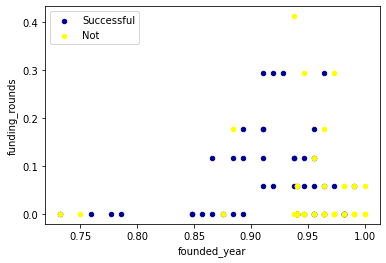

In [75]:
ax = data[data['target'] == 1][0:50].plot(kind='scatter', x='founded_year', y='funding_rounds', color='DarkBlue', label='Successful');
data[data['target'] == 0][0:50].plot(kind='scatter', x='founded_year', y='funding_rounds', color='Yellow', label='Not', ax=ax);
plt.show()

##  Model Building and Model Evaluation
## 1. Random Forest

In [81]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF_ = RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.006271
20.0,0.005577
30.0,0.005548
40.0,0.005606
50.0,0.005548
100.0,0.005462
150.0,0.005433
200.0,0.005375
300.0,0.005433


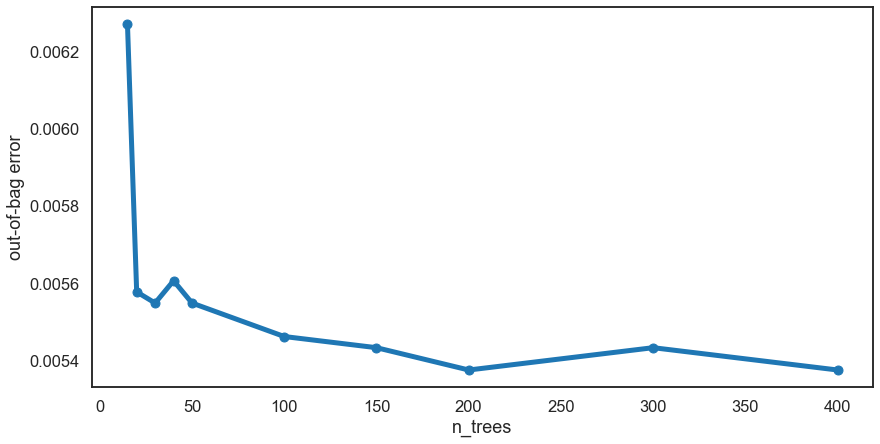

In [83]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [84]:
model = RF.set_params(n_estimators=100)

y_predRF = model.predict(X_test)

In [85]:
# Plot non-normalized confusion matrix
cr = classification_report(y_test, y_predRF)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_predRF),
                         'precision': precision_score(y_test, y_predRF),
                         'recall': recall_score(y_test, y_predRF),
                         'f1': f1_score(y_test, y_predRF),
                         'auc': roc_auc_score(y_test, y_predRF)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13632
           1       1.00      0.93      0.96      1200

    accuracy                           0.99     14832
   macro avg       1.00      0.96      0.98     14832
weighted avg       0.99      0.99      0.99     14832

   accuracy  precision    recall        f1       auc
0  0.993999        1.0  0.925833  0.961489  0.962917


Text(0.5, 1.0, '\n Confusion Matrix for Random Forest \n')

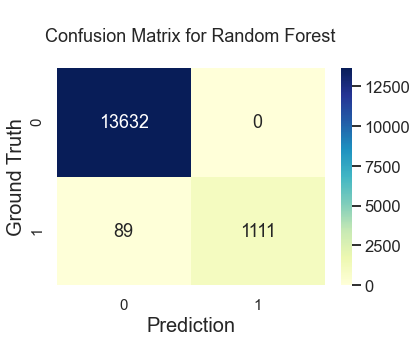

In [86]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_predRF)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
### END SOLUTION

labels = ['0', '1']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels[::1], fontsize=15);
ax.set_ylabel('Ground Truth', fontsize=20);
ax.set_xlabel('Prediction', fontsize=20)

ax.set_title('\n Confusion Matrix for Random Forest \n')
### END SOLUTION

## 2. Logistic Regresion

In [88]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# L2 regularized logistic regression
LR_L2 = LogisticRegression(penalty='l2', max_iter=500, solver='saga').fit(X_train, y_train)

In [89]:
y_predLR = LR_L2.predict(X_test)
print(classification_report(y_predLR, y_test))

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_predLR),
                         'precision': precision_score(y_test, y_predLR),
                         'recall': recall_score(y_test, y_predLR),
                         'f1': f1_score(y_test, y_predLR),
                         'auc': roc_auc_score(y_test, y_predLR)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     14832
           1       0.00      0.00      0.00         0

    accuracy                           0.92     14832
   macro avg       0.50      0.46      0.48     14832
weighted avg       1.00      0.92      0.96     14832

   accuracy  precision  recall   f1  auc
0  0.919094        0.0     0.0  0.0  0.5


Text(0.5, 1.0, ' \n Confusion Matrix for Logistic Regression \n')

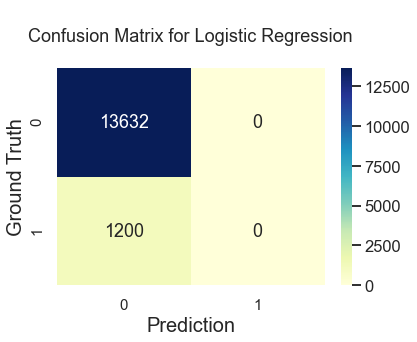

In [90]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_predLR)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
### END SOLUTION

labels = ['0', '1']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels[::1], fontsize=15);
ax.set_ylabel('Ground Truth', fontsize=20);
ax.set_xlabel('Prediction', fontsize=20)

ax.set_title(' \n Confusion Matrix for Logistic Regression \n')
### END SOLUTION

## 3. Gradient Boosting

In [101]:
### BEGIN SOLUTION
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()

# Iterate through various possibilities for number of trees
tree_list = [15, 20, 30, 50, 100, 200]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)

    # Fit the model
    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_predG = GBC.predict(X_test)

    # Get the error
    error = 1.0 - accuracy_score(y_test, y_predG)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 15 trees
Fitting model with 20 trees
Fitting model with 30 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees


,error
n_trees,
15.0,0.006540
20.0,0.006540
30.0,0.006540
50.0,0.006607
100.0,0.006270
200.0,0.005663


In [102]:
### BEGIN SOLUTION
from sklearn.model_selection import GridSearchCV

tree_list = [15, 20]
# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

In [103]:
# The best model
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=4, n_estimators=20, random_state=42,
                           subsample=0.5)

In [104]:
# Plot non-normalized confusion matrix


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_predG)
print(cr)

score_df1 = pd.DataFrame({'accuracy': accuracy_score(y_test, y_predG),
                         'precision': precision_score(y_test, y_predG),
                         'recall': recall_score(y_test, y_predG),
                         'f1': f1_score(y_test, y_predG),
                         'auc': roc_auc_score(y_test, y_predG)},
                         index=pd.Index([0]))

print(score_df1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13632
           1       0.99      0.94      0.96      1200

    accuracy                           0.99     14832
   macro avg       0.99      0.97      0.98     14832
weighted avg       0.99      0.99      0.99     14832

   accuracy  precision    recall        f1      auc
0  0.994337   0.992933  0.936667  0.963979  0.96804


Text(0.5, 1.0, '\n Confusion Matrix for Gradient Boosting \n')

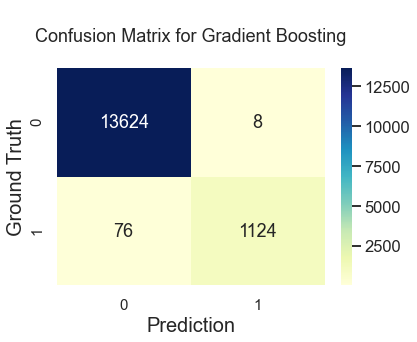

In [105]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_predG)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
### END SOLUTION
labels = ['0', '1']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels[::1], fontsize=15);
ax.set_ylabel('Ground Truth', fontsize=20);
ax.set_xlabel('Prediction', fontsize=20)

ax.set_title('\n Confusion Matrix for Gradient Boosting \n')
### END SOLUTION

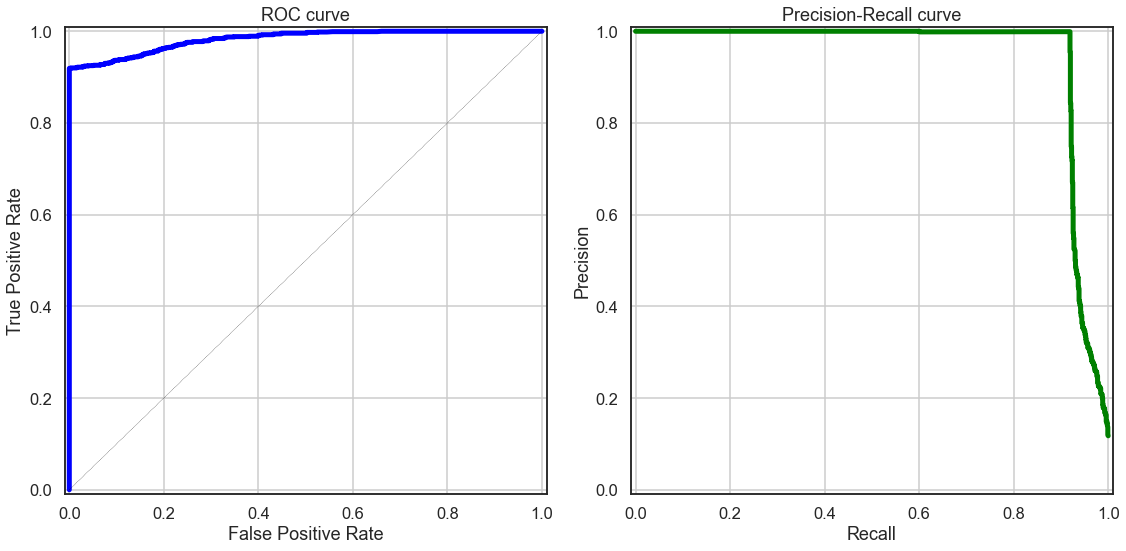

In [106]:

from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = GV_GBC.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, color='blue', linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, color='green', linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

## Addition : Check the correlation of each variable




<AxesSubplot:>

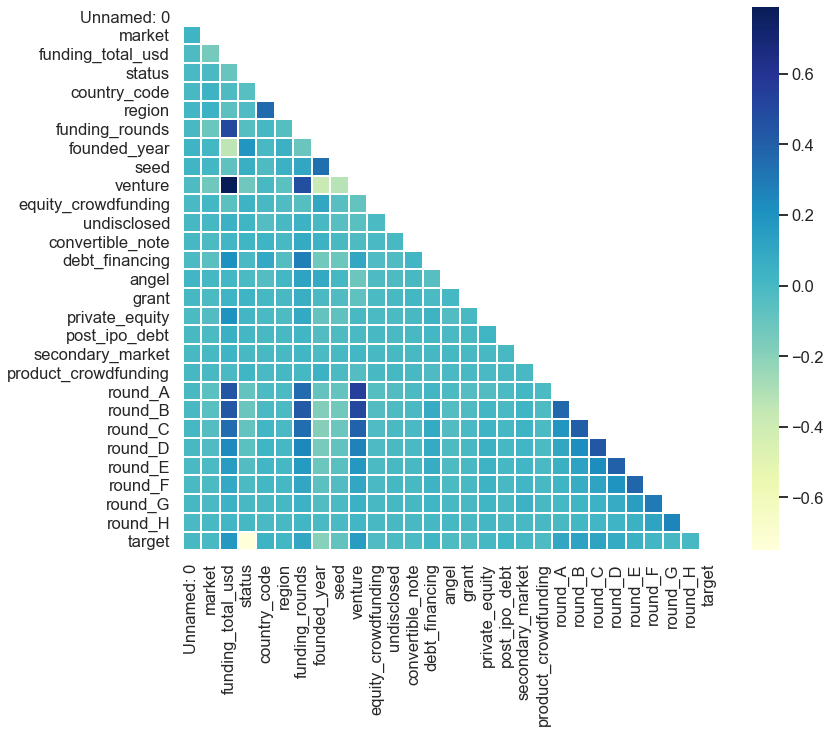

In [107]:
corrmat = data.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))

matrix = np.triu(corrmat)
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1, mask=matrix, annot = False)

In [108]:
y = data4['target']
fields = list(data4.columns[:-1])  # everything except "color"
correlations = data4[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations


status                 -0.875445
founded_year           -0.134102
seed                   -0.013787
grant                  -0.006466
equity_crowdfunding    -0.005853
product_crowdfunding   -0.004435
secondary_market       -0.002787
round_G                -0.001910
round_H                -0.001554
angel                  -0.001353
convertible_note       -0.001075
debt_financing          0.000162
round_F                 0.000280
market                  0.004286
undisclosed             0.004894
private_equity          0.006603
post_ipo_debt           0.007197
round_E                 0.009743
region                  0.011954
round_D                 0.025184
funding_total_usd       0.028143
round_A                 0.046159
round_C                 0.052987
country_code            0.053599
venture                 0.064762
round_B                 0.072362
funding_rounds          0.084266
dtype: float64

In [109]:
correlations.map(abs).sort_values(ascending=False)

status                  0.875445
founded_year            0.134102
funding_rounds          0.084266
round_B                 0.072362
venture                 0.064762
country_code            0.053599
round_C                 0.052987
round_A                 0.046159
funding_total_usd       0.028143
round_D                 0.025184
seed                    0.013787
region                  0.011954
round_E                 0.009743
post_ipo_debt           0.007197
private_equity          0.006603
grant                   0.006466
equity_crowdfunding     0.005853
undisclosed             0.004894
product_crowdfunding    0.004435
market                  0.004286
secondary_market        0.002787
round_G                 0.001910
round_H                 0.001554
angel                   0.001353
convertible_note        0.001075
round_F                 0.000280
debt_financing          0.000162
dtype: float64

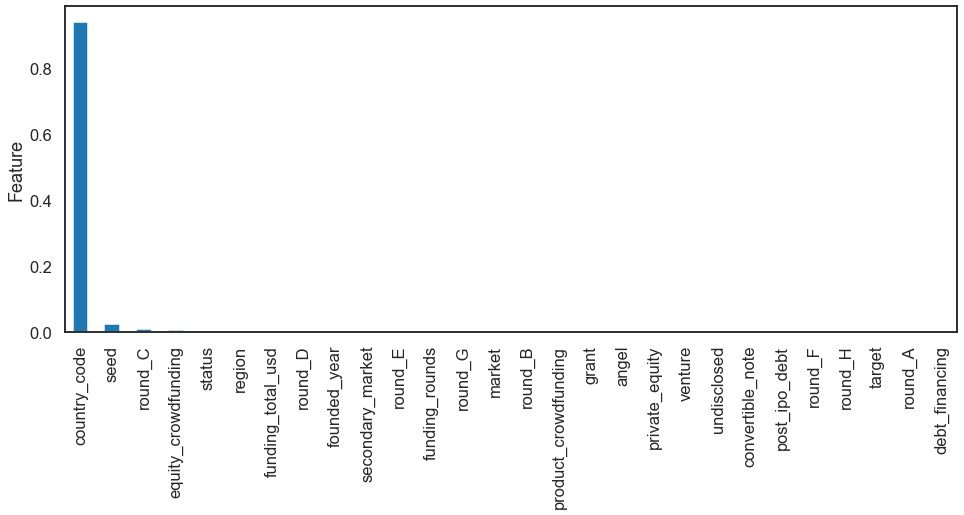

In [110]:

all = list(data4.columns[::])
feature_imp = pd.Series(GV_GBC.best_estimator_.feature_importances_, index=all).sort_values(ascending=False)
ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

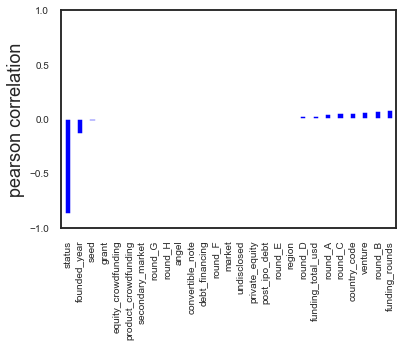

In [111]:
ax = correlations.plot(kind='bar', color='blue', fontsize=10)
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [112]:
fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data4[fields]
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['founded_year', 'status'], dtype='object')
Index(['founded_year_scaled', 'status_scaled'], dtype='object')
